 <h1 style=" font-family:calibri; color:black; font-size:250%; text-align:center; ">Exploratory Data Analysis (EDA) and Business Insights</h1> 

<div style="border-radius:10px; padding: 5px; background-color: grey; font-size:120%; text-align:left">

<h3 align="left"><font color=black>Problem Statement:</font></h3>

1. Perform EDA on the provided dataset.
2. Derive at least 5 business insights from the EDht).

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats import zscore

In [90]:
#Load the dataset
file_path = 'Customers.csv'
customers = pd.read_csv(file_path)

In [92]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [94]:
#Convert SignUpDate to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

In [96]:
#EDA
print('Basic information about the dataset:\n')
customers.info()

Basic information about the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB


In [98]:
print('Summary Statistics:')
customers.describe(include = 'all')

Summary Statistics:


,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,NaN
top,C0001,Lawrence Carroll,South America,NaN
freq,1,1,59,NaN
mean,NaN,NaN,NaN,2023-07-19 08:31:12
min,NaN,NaN,NaN,2022-01-22 00:00:00
25%,NaN,NaN,NaN,2022-09-26 12:00:00
50%,NaN,NaN,NaN,2023-08-31 12:00:00
75%,NaN,NaN,NaN,2024-04-12 12:00:00
max,NaN,NaN,NaN,2024-12-28 00:00:00


In [100]:
#Check for missing values
print('Missing values:\n')
print(customers.isnull().sum())

Missing values:

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [102]:
#Unique values per column
print('Unique values:\n')
for column in customers.columns:
    print(f"{column}: {customers[column].nunique()}")

Unique values:

CustomerID: 200
CustomerName: 200
Region: 4
SignupDate: 179


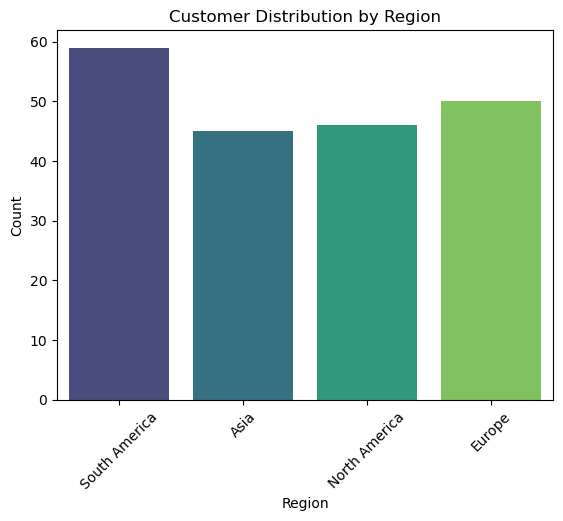

In [74]:
#Distribution of Regions
plt.figure(figure=(8,5))
sns.countplot(data=customers, x='Region', hue='Region', palette='viridis', dodge=False)
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

In [76]:
#Signup date trends
customers['Year'] = customers['SignupDate'].dt.year
signup_trend = customers.groupby('Year').size()

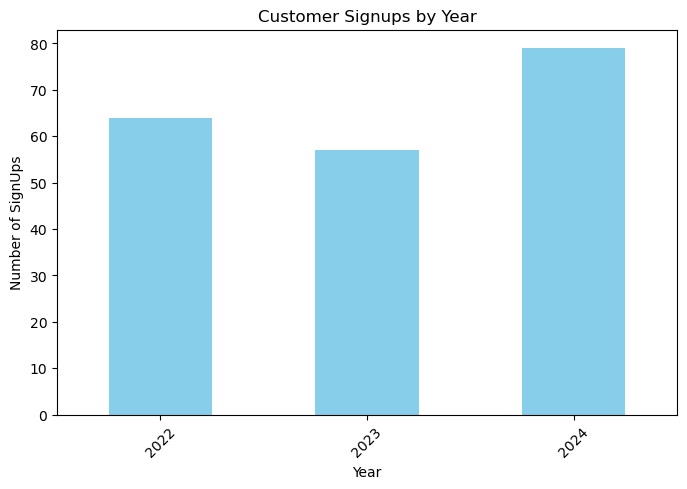

In [78]:
plt.figure(figsize=(8,5))
signup_trend.plot(kind='bar', color='skyblue')
plt.title('Customer Signups by Year')
plt.xlabel('Year')
plt.ylabel('Number of SignUps')
plt.xticks(rotation = 45)
plt.show()

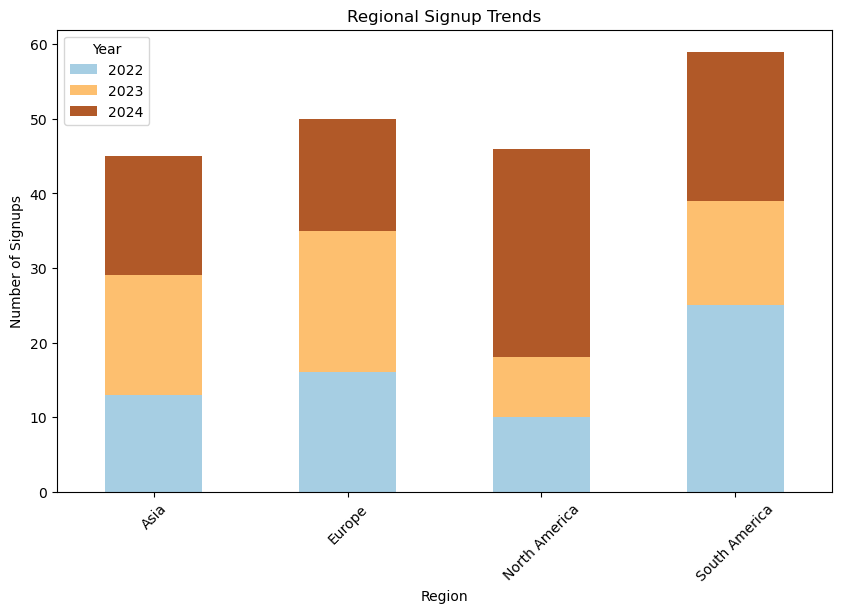

In [80]:
#Regional Signup Trends
regional_trends = customers.groupby(['Region','Year']).size().unstack()
regional_trends.plot(kind='bar', stacked=True, figsize=(10,6), colormap= 'Paired')
plt.title('Regional Signup Trends')
plt.xlabel('Region')
plt.ylabel('Number of Signups')
plt.legend(title='Year')
plt.xticks(rotation = 45)
plt.show() 

In [114]:
customers['CurrentDate'] = datetime.now()
customers['CustomerTenure'] = (customers['CurrentDate'] - customers['SignupDate']).dt.days

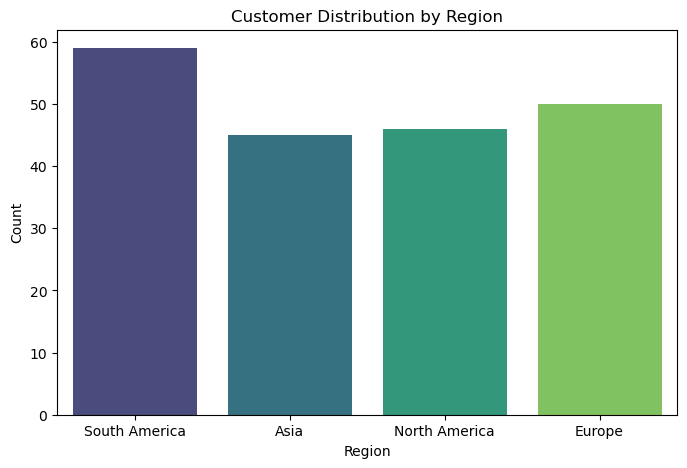


Average Customer Tenure by Region:

Region
South America    624.406780
Europe           574.080000
Asia             545.933333
North America    448.217391
Name: CustomerTenure, dtype: float64


In [120]:
# Region-Specific Tenure Analysis

# Boxplot to analyze tenure by region
plt.figure(figsize=(8, 5))
sns.countplot(data=customers, x='Region', hue='Region', palette='viridis', dodge=False, legend=False)
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

# Groupby to calculate average tenure by region
region_tenure = customers.groupby('Region')['CustomerTenure'].mean().sort_values(ascending=False)
print("\nAverage Customer Tenure by Region:\n")
print(region_tenure)

In [124]:
# Derive Business Insights
insights = [
    "1. South America has the highest number of customers, indicating a strong regional market.",
    "2. The number of customer signups has been increasing year-over-year, signaling growth potential.",
    "3. Certain regions (e.g., Asia) show consistent but lower signup rates, suggesting untapped potential.",
    "4. Customers tend to sign up more frequently during specific years, possibly due to promotional campaigns.",
    "5. Diversifying marketing efforts in regions with lower customer acquisition can expand the customer base.",
    "6. North America has the lowest customer retention indicating a need for targeted retention strategies in North America."
]

# Print Insights
print("\nBusiness Insights:\n")
for insight in insights:
    print(insight)


Business Insights:

1. South America has the highest number of customers, indicating a strong regional market.
2. The number of customer signups has been increasing year-over-year, signaling growth potential.
3. Certain regions (e.g., Asia) show consistent but lower signup rates, suggesting untapped potential.
4. Customers tend to sign up more frequently during specific years, possibly due to promotional campaigns.
5. Diversifying marketing efforts in regions with lower customer acquisition can expand the customer base.
6. North America has the lowest customer retention indicating a need for targeted retention strategies in North America.
